#Check GPU

In [ ]:
!nvidia-smi

Tue Jul 30 03:17:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Import Library

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, BatchNormalization, Dropout, ReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Build Model

In [ ]:
# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(16, (3, 3), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),
                 kernel_regularizer=tf.keras.regularizers.l2(0.05), bias_regularizer=tf.keras.regularizers.l2(0.05),
                 input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Second convolutional layer
model.add(Conv2D(16, (5, 5), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),
                 kernel_regularizer=tf.keras.regularizers.l2(0.05), bias_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Third convolutional layer
model.add(Conv2D(16, (7, 7), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),
                 kernel_regularizer=tf.keras.regularizers.l2(0.05), bias_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 222, 222, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 107, 107, 16)        │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 107, 107, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 107, 107, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 53, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 47, 47, 16)          │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 47, 47, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 47, 47, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8464)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           8,465 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,081 (109.69 KB)

 Trainable params: 27,985 (109.32 KB)

 Non-trainable params: 96 (384.00 B)

#Train Model: 1st Training using Okra


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/RM Adel/dataset/Train/Okra')
labels = ['freshokra', 'rottenokra']

In [ ]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "freshokra":	 635
Images of label "rottenokra":	 338


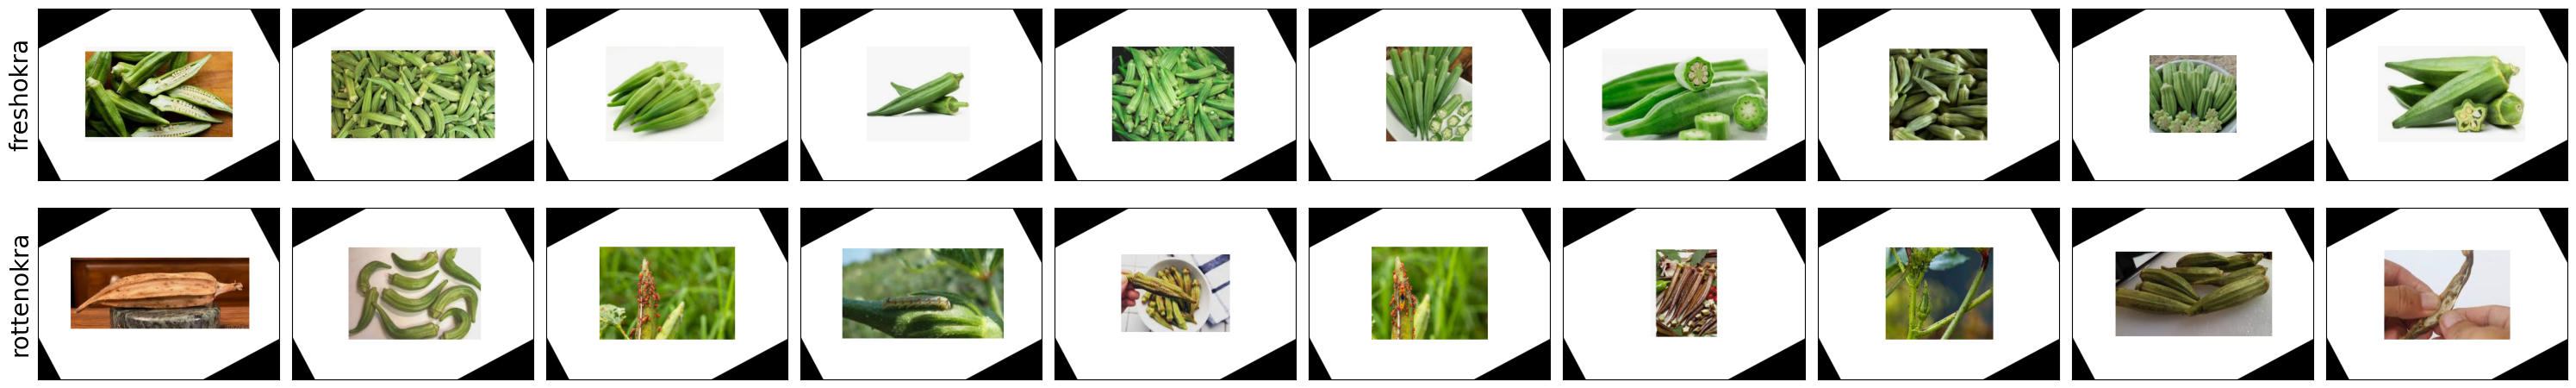

In [ ]:
plt.figure(figsize=(30,14))

for i in range(2):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)

        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
directory = os.path.join(train_dir, 'freshokra')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(320, 450, 3)

In [ ]:
# Define the data generators
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/RM Adel/dataset/Train/Okra',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/RM Adel/dataset/Test/Okra',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())

print(labels)

Found 877 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
{0: 'freshokra', 1: 'rottenokra'}


In [ ]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5785 - loss: 1.7953 - val_accuracy: 0.6271 - val_loss: 1.4842
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5831 - loss: 1.7615 - val_accuracy: 0.6271 - val_loss: 1.4775
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5731 - loss: 1.7587 - val_accuracy: 0.6271 - val_loss: 1.4717
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5641 - loss: 1.7729 - val_accuracy: 0.6271 - val_loss: 1.4708
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5787 - loss: 1.7723 - val_accuracy: 0.6271 - val_loss: 1.4651
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6134 - loss: 1.6312 - val_accuracy: 0.6271 - val_loss: 1.4591
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6050 - loss: 1.6892 - val_accuracy: 0.5932 - val_loss: 1.4564
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5999 - loss: 1.6252 - val_accuracy: 0.5763 - val_loss: 1.4608


In [ ]:
all_test_x = []
all_test_y = []

# Iterate through all batches of data
for i in range(len(validation_generator)):
    test_x, test_y = validation_generator.__getitem__(i)
    all_test_x.append(test_x)
    all_test_y.append(test_y)

# Concatenate batches along the batch axis (axis=0)
all_test_x = np.concatenate(all_test_x, axis=0)
all_test_y = np.concatenate(all_test_y, axis=0)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step


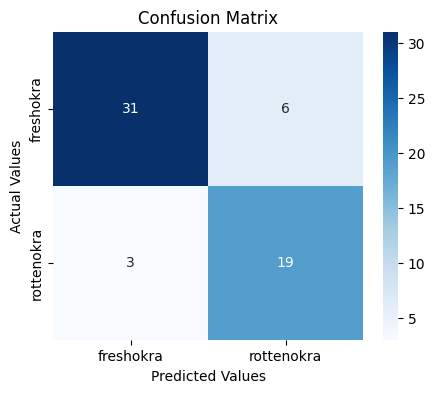

In [ ]:
# Predict on the test set
preds2 = model.predict(all_test_x)

# Convert continuous predictions to discrete class predictions
preds2_discrete = (preds2 > 0.5).astype(int).reshape(-1)  # Binary classification threshold

# Ensure test_y is in the correct shape
all_test_y = all_test_y.reshape(-1)  # Flatten if necessary

# Calculate confusion matrix
cf_matrix = confusion_matrix(all_test_y, preds2_discrete)
cm_df = pd.DataFrame(cf_matrix, index=['freshokra', 'rottenokra'], columns=['freshokra', 'rottenokra'])

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sb.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


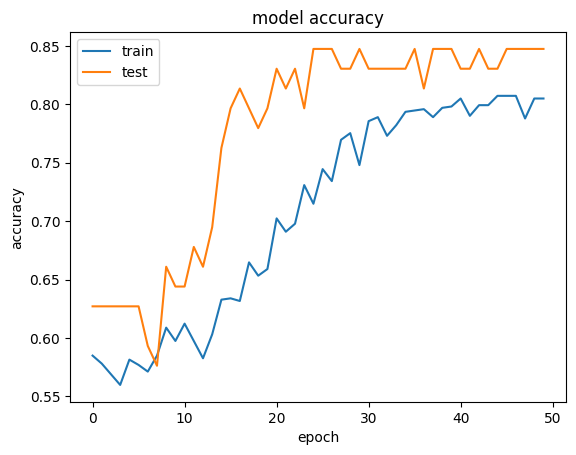

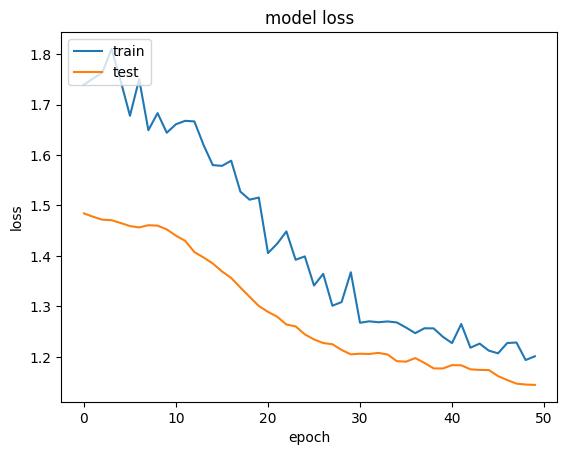

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(all_test_y, preds2_discrete)

# Calculate precision
precision = precision_score(all_test_y, preds2_discrete)

# Calculate recall
recall = recall_score(all_test_y, preds2_discrete)

# Calculate f1 score
f1 = f1_score(all_test_y, preds2_discrete)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.847457627118644
Precision: 0.76
Recall: 0.8636363636363636
F1-Score: 0.8085106382978724


In [ ]:
#Save Model
model.save('defect_detection_model_epochs50_rev.keras')

#Train Model: 2nd Training using Apple


In [ ]:
# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/RM Adel/defect_detection_model_epochs50_rev.keras')

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/RM Adel/dataset/Train/Apple')
labels = ['freshapples', 'rottenapples']

In [ ]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "freshapples":	 2434
Images of label "rottenapples":	 3248


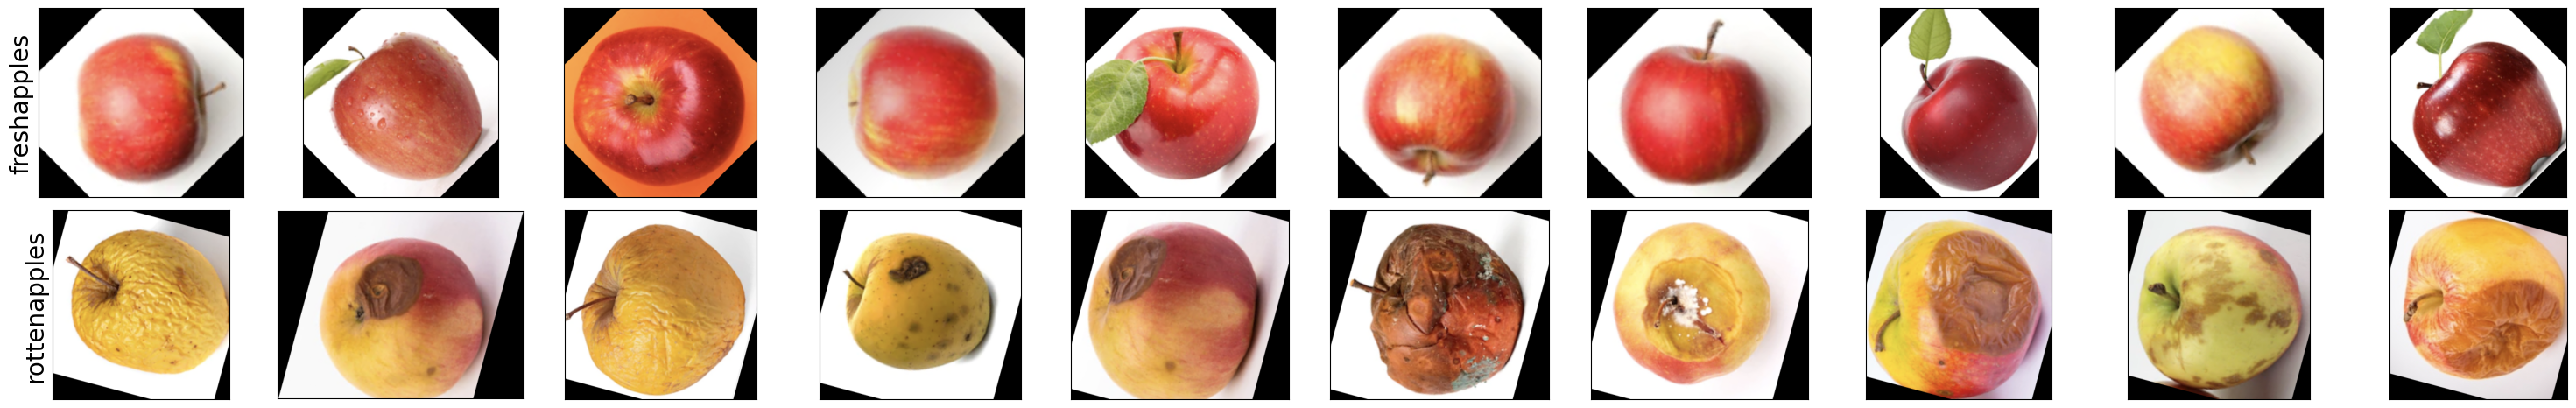

In [ ]:
plt.figure(figsize=(30,14))

for i in range(2):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)

        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
directory = os.path.join(train_dir, 'freshapples')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(182, 198, 3)

In [ ]:
# Define the data generators
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/RM Adel/dataset/Train/Apple',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/RM Adel/dataset/Test/Apple',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())

print(labels)

Found 5115 images belonging to 2 classes.
Found 177 images belonging to 2 classes.
{0: 'freshapples', 1: 'rottenapples'}


In [ ]:
history = model.fit(train_generator, epochs=30, verbose=1, validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


320/320 ━━━━━━━━━━━━━━━━━━━━ 1221s 3s/step - accuracy: 0.6356 - loss: 1.6722 - val_accuracy: 0.7288 - val_loss: 1.3008
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 473s 1s/step - accuracy: 0.6573 - loss: 1.4584 - val_accuracy: 0.7458 - val_loss: 1.2122
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.7536 - loss: 1.2645 - val_accuracy: 0.7458 - val_loss: 1.2375
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.8089 - loss: 1.1735 - val_accuracy: 0.7571 - val_loss: 1.2208
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.8211 - loss: 1.1402 - val_accuracy: 0.7627 - val_loss: 1.1844
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 467s 1s/step - accuracy: 0.8370 - loss: 1.1075 - val_accuracy: 0.7458 - val_loss: 1.2649
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 466s 1s/step - accuracy: 0.8478 - loss: 1.0869 - val_accuracy: 0.7571 - val_loss: 1.1855
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 503s 1s/step - accuracy: 0.8443 - loss: 1.0732 - val_accuracy: 0.75

In [ ]:
all_test_x = []
all_test_y = []

# Iterate through all batches of data
for i in range(len(validation_generator)):
    test_x, test_y = validation_generator.__getitem__(i)
    all_test_x.append(test_x)
    all_test_y.append(test_y)

# Concatenate batches along the batch axis (axis=0)
all_test_x = np.concatenate(all_test_x, axis=0)
all_test_y = np.concatenate(all_test_y, axis=0)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step


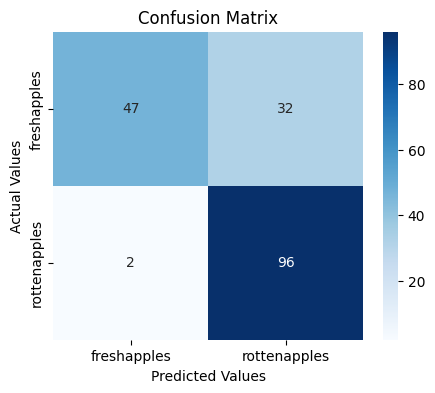

In [ ]:
# Predict on the test set
preds2 = model.predict(all_test_x)

# Convert continuous predictions to discrete class predictions
preds2_discrete = (preds2 > 0.5).astype(int).reshape(-1)  # Binary classification threshold

# Ensure test_y is in the correct shape
all_test_y = all_test_y.reshape(-1)  # Flatten if necessary

# Calculate confusion matrix
cf_matrix = confusion_matrix(all_test_y, preds2_discrete)
cm_df = pd.DataFrame(cf_matrix, index=['freshapples', 'rottenapples'], columns=['freshapples', 'rottenapples'])

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sb.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


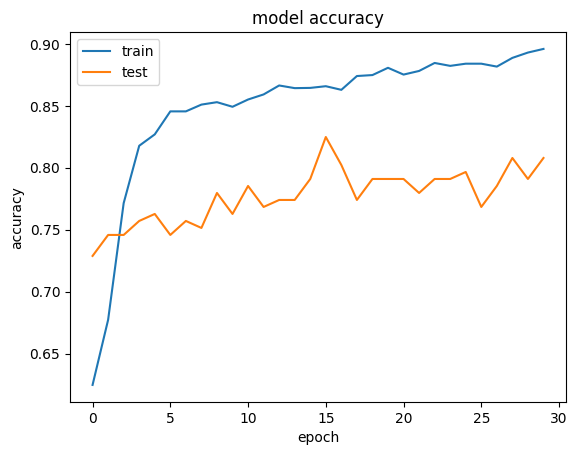

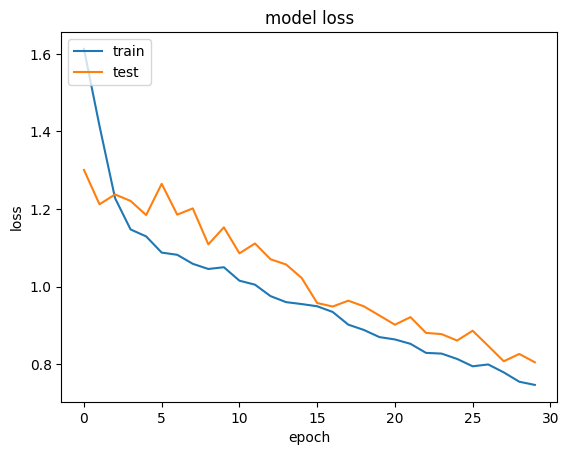

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(all_test_y, preds2_discrete)

# Calculate precision
precision = precision_score(all_test_y, preds2_discrete)

# Calculate recall
recall = recall_score(all_test_y, preds2_discrete)

# Calculate f1 score
f1 = f1_score(all_test_y, preds2_discrete)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.807909604519774
Precision: 0.75
Recall: 0.9795918367346939
F1-Score: 0.8495575221238937


In [ ]:
#Save Model
model.save('defect_detection_model_epochs30_second_rev.keras')

#Train Model: 3rd Training using Okra


In [ ]:
# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/RM Adel/defect_detection_model_epochs30_second_rev.keras')

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/RM Adel/dataset/Train/Okra')
labels = ['freshokra', 'rottenokra']

In [ ]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "freshokra":	 635
Images of label "rottenokra":	 338


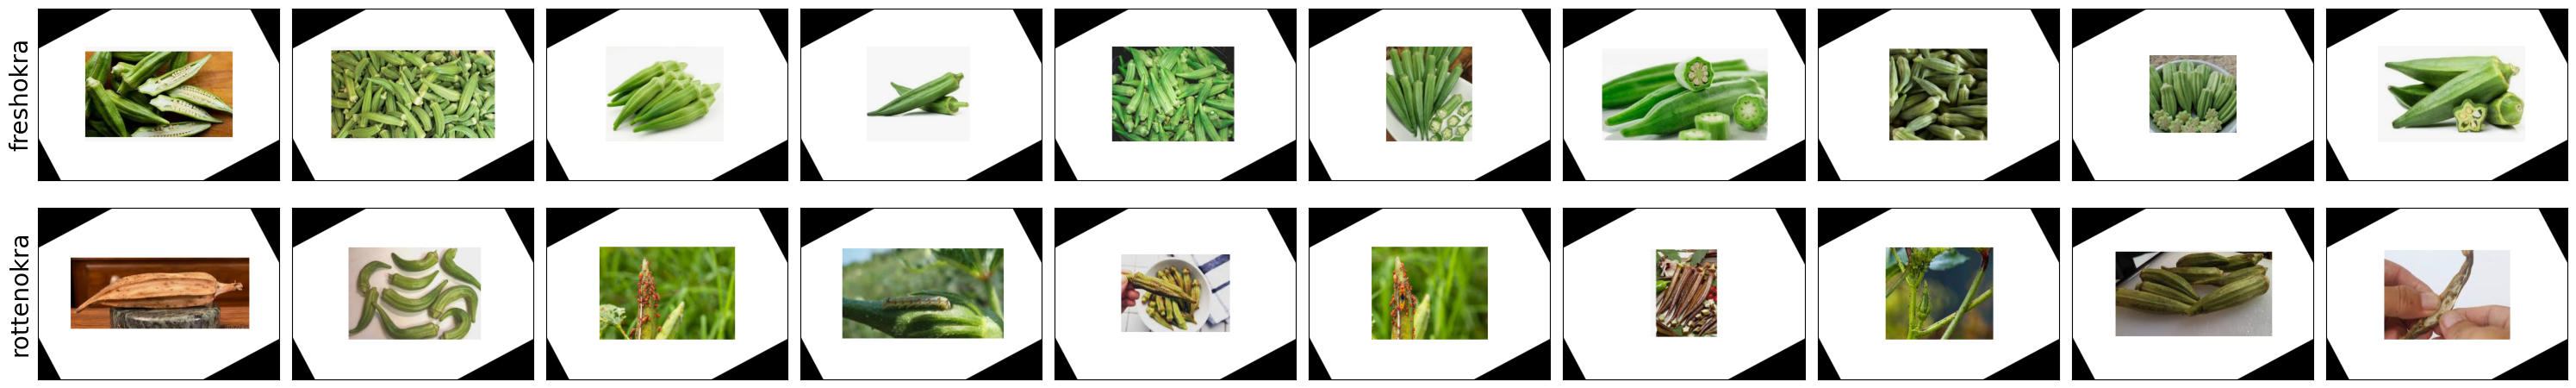

In [ ]:
plt.figure(figsize=(30,14))

for i in range(2):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)

        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
directory = os.path.join(train_dir, 'freshokra')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(320, 450, 3)

In [ ]:
# Define the data generators
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/RM Adel/dataset/Train/Okra',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/RM Adel/dataset/Test/Okra',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())

print(labels)

Found 877 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
{0: 'freshokra', 1: 'rottenokra'}


In [ ]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.6973 - loss: 1.5104 - val_accuracy: 0.4915 - val_loss: 1.9041
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8265 - loss: 1.0810 - val_accuracy: 0.5932 - val_loss: 1.5722
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8033 - loss: 1.0557 - val_accuracy: 0.6949 - val_loss: 1.2982
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7790 - loss: 1.0933 - val_accuracy: 0.7119 - val_loss: 1.1612
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8111 - loss: 0.9989 - val_accuracy: 0.7627 - val_loss: 1.0856
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7989 - loss: 1.0254 - val_accuracy: 0.7627 - val_loss: 1.0265
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8263 - loss: 0.9124 - val_accuracy: 0.7797 - val_loss: 0.9703
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8229 - loss: 0.9433 - val_accuracy: 0.7797 - val_loss: 0.9526
E

In [ ]:
all_test_x = []
all_test_y = []

# Iterate through all batches of data
for i in range(len(validation_generator)):
    test_x, test_y = validation_generator.__getitem__(i)
    all_test_x.append(test_x)
    all_test_y.append(test_y)

# Concatenate batches along the batch axis (axis=0)
all_test_x = np.concatenate(all_test_x, axis=0)
all_test_y = np.concatenate(all_test_y, axis=0)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step


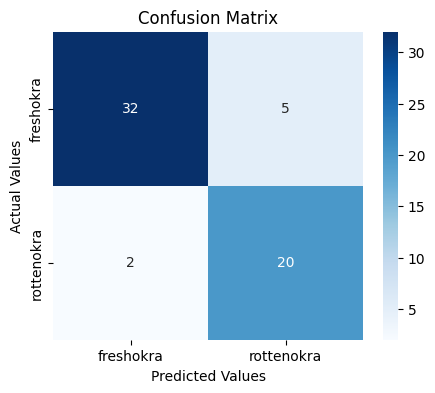

In [ ]:
# Predict on the test set
preds2 = model.predict(all_test_x)

# Convert continuous predictions to discrete class predictions
preds2_discrete = (preds2 > 0.5).astype(int).reshape(-1)  # Binary classification threshold

# Ensure test_y is in the correct shape
all_test_y = all_test_y.reshape(-1)  # Flatten if necessary

# Calculate confusion matrix
cf_matrix = confusion_matrix(all_test_y, preds2_discrete)
cm_df = pd.DataFrame(cf_matrix, index=['freshokra', 'rottenokra'], columns=['freshokra', 'rottenokra'])

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sb.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


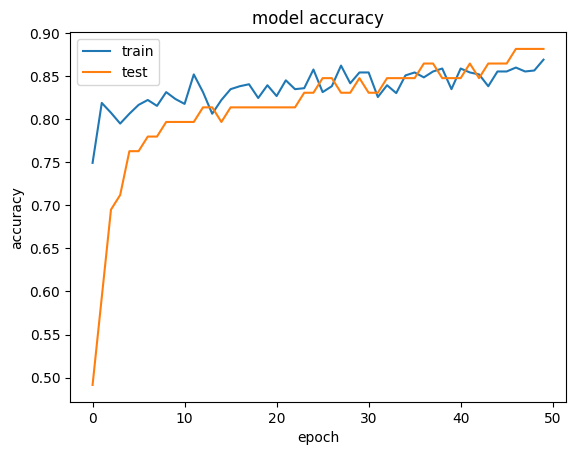

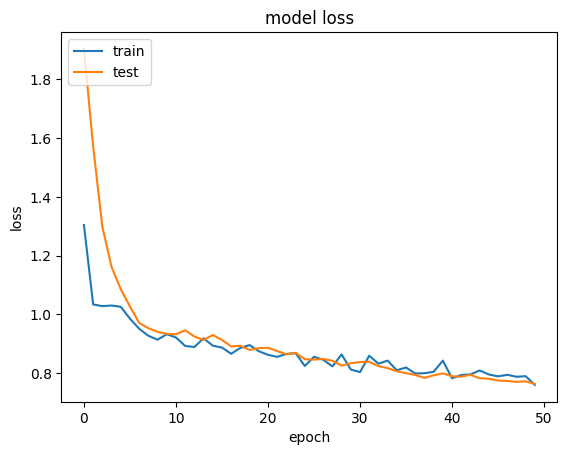

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(all_test_y, preds2_discrete)

# Calculate precision
precision = precision_score(all_test_y, preds2_discrete)

# Calculate recall
recall = recall_score(all_test_y, preds2_discrete)

# Calculate f1 score
f1 = f1_score(all_test_y, preds2_discrete)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8813559322033898
Precision: 0.8
Recall: 0.9090909090909091
F1-Score: 0.8510638297872342


In [ ]:
#Save Model
model.save('defect_detection_model_epochs30_third_rev.keras')